In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [3]:
def cleancols(df):
    return df

def vectcols(df):
    string_columns = list(df.dtypes[df.dtypes == 'object'].index) 
    for col in string_columns:
        df = df.copy()
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1) 
    return df

def stdcols(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')  
    string_columns = list(df.dtypes[df.dtypes == 'object'].index)  
    for col in string_columns:
        df[col] = df[col].str.lower().str.replace(' ', '_') 
        df[col] = df[col].fillna('')
    for col in [c for c in df.columns if c not in string_columns]: 
        df[col] = df[col].fillna(df[col].mean())
        df[col] = df[col].astype(int) 
    
    df.sex = (df.sex == 'male').astype(int) 
    le = LabelEncoder() 
    df.embarked = le.fit_transform(df.embarked)
    df.sex = le.fit_transform(df.sex) 
    df.drop(['name', 'ticket','cabin', 'passengerid'], axis=1, inplace=True)
  
    return df    

In [5]:
df = pd.read_csv('titanic/titanic_data.csv', sep=';')  

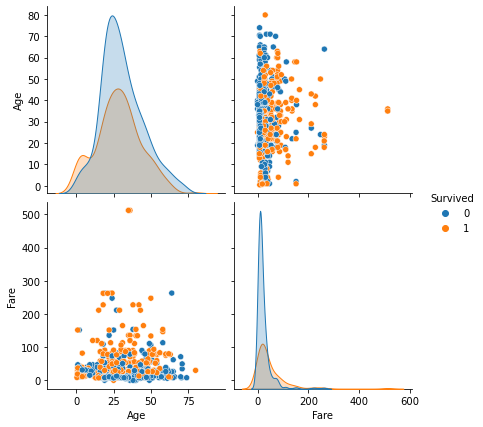

In [6]:
sns.pairplot(df[['Survived', 'Age', 'Fare']], hue='Survived', size=3 );  
 

In [7]:
df = stdcols(df) 
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22,1,0,7,3
1,1,1,0,38,1,0,71,1
2,1,3,0,26,0,0,7,3
3,1,1,0,35,1,0,53,3
4,0,3,1,35,0,0,8,3
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,3
887,1,1,0,19,0,0,30,3
888,0,3,0,29,1,2,23,3
889,1,1,1,26,0,0,30,1


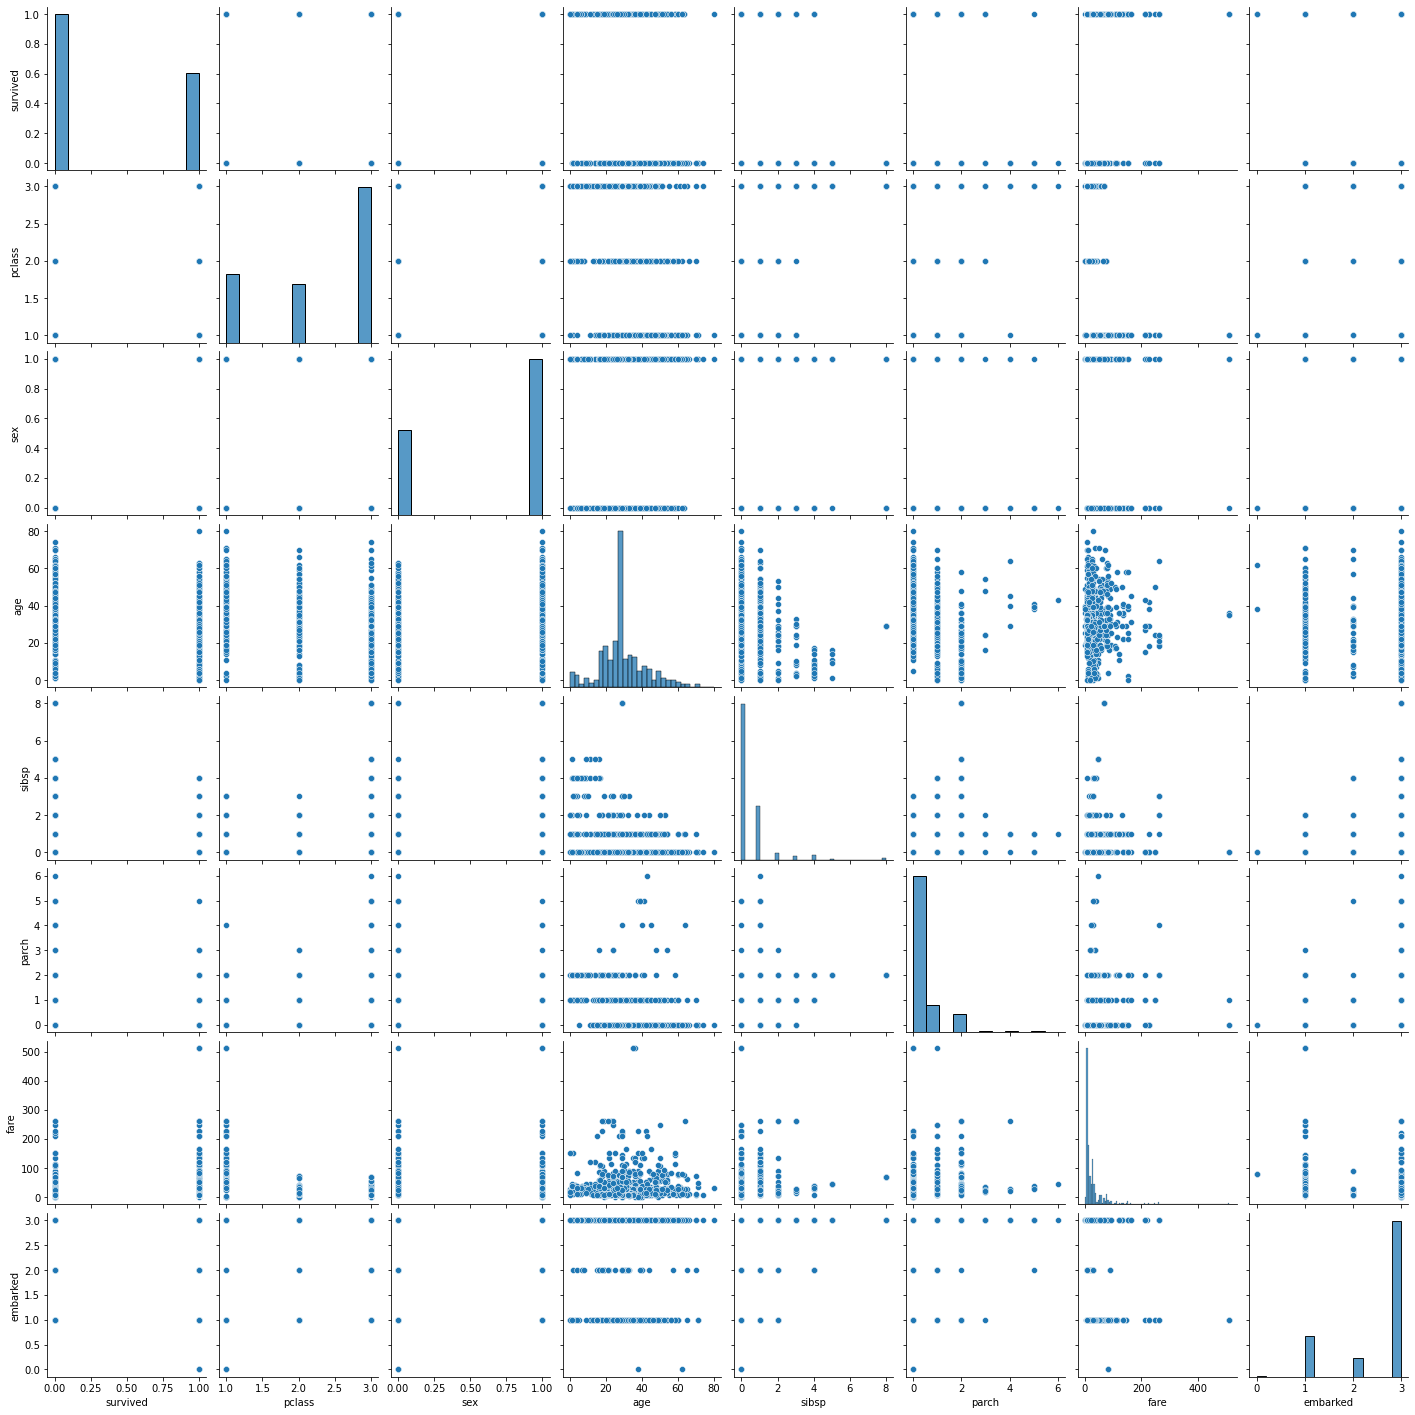

In [9]:
sns.pairplot(df)

In [75]:
#df['age_bin'] = pd.cut(df['age'],  bins=[0, 20, 40, 60, 90], labels=[1,2,3,4])
#df

In [10]:
df_clean = df

In [13]:
quartiles = df['fare'].quantile([.25,.5,.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3-Q1

lb = Q1 - (1.5*IQR)
ub = Q3 + (1.5*IQR)

<AxesSubplot:xlabel='fare', ylabel='Density'>

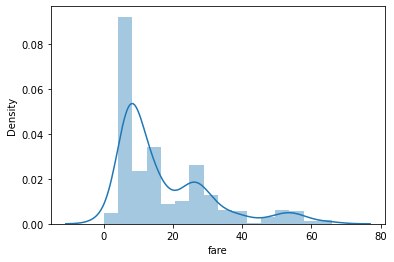

In [15]:
df = df.loc[ df.fare < ub]
sns.distplot(df.fare)


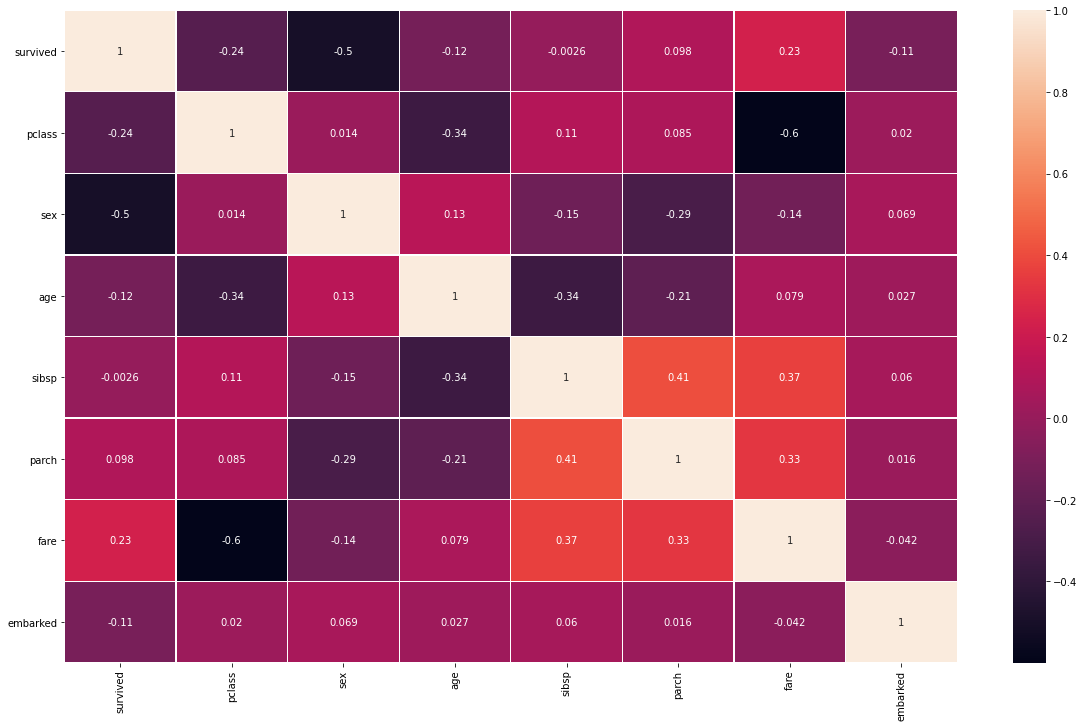

In [26]:
sns.heatmap(df.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [27]:
y = df['survived'].values 
X = df.drop(['survived'], axis=1).values 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7692307692307693

In [18]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.964 / 0.723
k: 3, Train/Test Score: 0.881 / 0.790
k: 5, Train/Test Score: 0.857 / 0.779
k: 7, Train/Test Score: 0.857 / 0.790
k: 9, Train/Test Score: 0.844 / 0.779
k: 11, Train/Test Score: 0.851 / 0.779
k: 13, Train/Test Score: 0.852 / 0.790
k: 15, Train/Test Score: 0.849 / 0.790
k: 17, Train/Test Score: 0.847 / 0.795
k: 19, Train/Test Score: 0.840 / 0.795
k: 21, Train/Test Score: 0.838 / 0.800
k: 23, Train/Test Score: 0.842 / 0.805
k: 25, Train/Test Score: 0.837 / 0.815
k: 27, Train/Test Score: 0.823 / 0.815
k: 29, Train/Test Score: 0.833 / 0.815


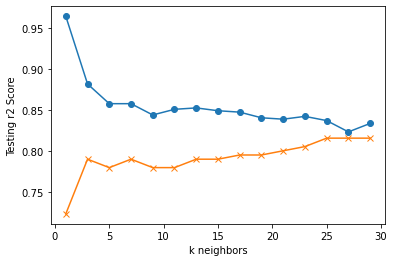

In [19]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f} / {test_score:.3f}")
     
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing r2 Score")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8153846153846154

In [104]:
print ( y_train[15] ) 
df.iloc[15].values

1


array([ 1,  2,  0, 55,  0,  0, 16,  3], dtype=int64)

In [106]:
pred = knn.predict([[ 2,  0, 55,  0,  0, 116,  3]])
pred

array([1])

In [29]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization) Ridge": Ridge(),
    " Linear Regression (L1 Regularization) Lasso": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(), 
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.") 
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test))) 

                     Linear Regression trained.
 Linear Regression (L2 Regularization) Ridge trained.
 Linear Regression (L1 Regularization) Lasso trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                     Linear Regression R^2 Score: 0.30131
 Linear Regression (L2 Regularization) Ridge R^2 Score: 0.30122
 Linear Regression (L1 Regularization) Lasso R^2 Score: 0.02546
                   K-Nearest Neighbors R^2 Score: -0.10115
                        Neural Network R^2 Score: 0.31908
                         Decision Tree R^2 Score: -0.26538
                         Random Forest R^2 Score: 0.14776
                     Gradient Boosting R^2 Score: 0.32631


0.672645739910314

In [31]:
model = Ridge()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pred = model.predict(X_test)
df_pred = pd.DataFrame({ 'pred': pred, 'act': y_test, 'err': pred-y_test  })
df_pred

0.30121734159019775


,pred,act,err
0,0.555711,1,-0.444289
1,0.200446,0,0.200446
2,1.112727,1,0.112727
3,0.648108,1,-0.351892
4,0.885313,1,-0.114687
...,...,...,...
190,0.014643,0,-0.014643
191,0.621824,0,0.621824
192,0.315187,0,0.315187
193,0.191421,0,0.191421


In [ ]:

sns.displot(df_pred, x="err", bins=20)

In [ ]:
def label_encoding:
    cat_data = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels','market_category', 'vehicle_size', 'vehicle_style']
    for col in cat_data:
        df[col] = df[col].fillna('')
    df = df.fillna(0)   
    labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
    for c in cat_data:
        df[c+'_cat'] = labelencoder.fit_transform(df[c])
        del df[c]
    df['age'] = 2017 - df['year']
    del df['year']
    for col in df.columns:
        df[col] = df[col].astype(int)
    df

In [ ]:
#sns.distplot(df.msrp, kde=False)

In [ ]:
#sns.distplot(df.msrp[df.msrp < 100000], kde=False)

In [ ]:
#log_price = np.log1p(df.msrp)
#sns.distplot(log_price, kde=False)

In [ ]:
#df.isnull().sum()

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=32)
y_train = df_train.msrp.values
y_test = df_test.msrp.values
del df_train['msrp'] 
del df_test['msrp']  
X_test = df_test.values 
X_train = df_train.values  
len(y_test)

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))    

In [ ]:
#X_train, y_train = make_regression(n_samples=2000, n_features=10, random_state=0, noise=4, bias=100.0)
model = LinearRegression() 
model.fit(X_train, y_train) 
model.intercept_

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
pred = model.predict(X_train) 
r2 = r2_score(y_train, pred) 
print(f"R-squared (R2 ): {r2}") 

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.msrp.values
y_val = df_val.msrp.values
del df_train['msrp']
del df_val['msrp'] 
del df_test['msrp'] 

In [ ]:
df_test

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [ ]:
df_num = df_num.fillna(0)
df_num

In [ ]:
X_train = df_num.values 

In [ ]:
model = LinearRegression()
reg = model.fit(X_train, y_train) 
reg.intercept_

In [ ]:
y_pred = reg.predict()

In [ ]:
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='y')
plt.legend()